In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
water = pd.read_csv('water.csv')

In [3]:
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


## Задание 1

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

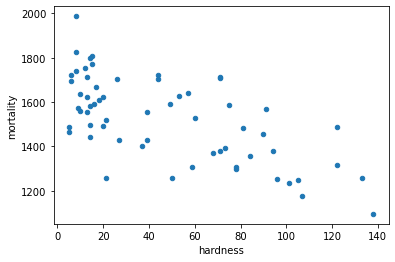

In [138]:
# Точечный график 

water.plot(kind='scatter', x='hardness', y='mortality')

In [139]:
# Корреляция Пирсона 

water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [140]:
# Корреляция Спирман

water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [141]:
# Линейная регрессия

from sklearn.linear_model import LinearRegression

In [142]:
X = water[['hardness']]
y = water['mortality']

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [145]:
X_train.shape

(42, 1)

In [146]:
y_train.shape

(42,)

In [147]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [148]:
model.coef_

array([-3.13167087])

In [149]:
model.intercept_

1668.9722977277095

In [150]:
# Коэффицент детерминации

model.score(X_test, y_test) 

0.5046490611017092

In [151]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

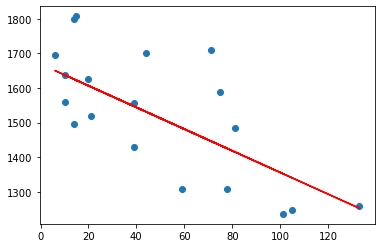

In [152]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

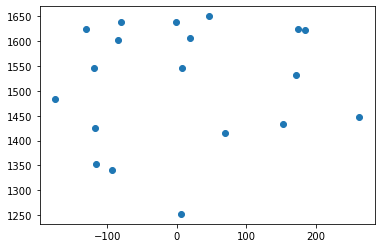

In [153]:
# График остатков

leftover = y_test - y_pred
plt.scatter(leftover, y_pred)

## Задание 2

Похожая зависимость сохраняется в Южных штатах.

In [163]:
south = water[water['location'] == 'South']
north = water[water['location'] == 'North']

### South

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

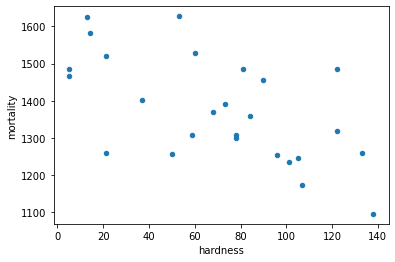

In [182]:
south.plot(kind='scatter', x='hardness', y='mortality')

In [183]:
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [184]:
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [200]:
X = south[['hardness']]
y = south['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [201]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [202]:
model.score(X_test, y_test) 

0.7724212353112112

In [203]:
y_pred = model.predict(X_test)
y_pred

array([1265.06956433, 1518.32103686, 1301.86678684])

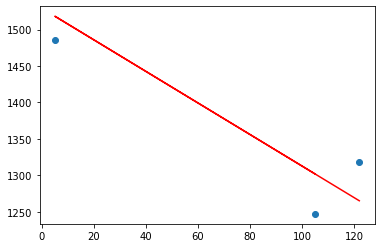

In [204]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

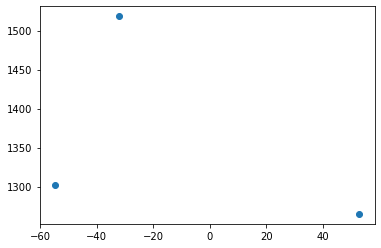

In [205]:
leftover = y_test - y_pred
plt.scatter(leftover, y_pred)

### North

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

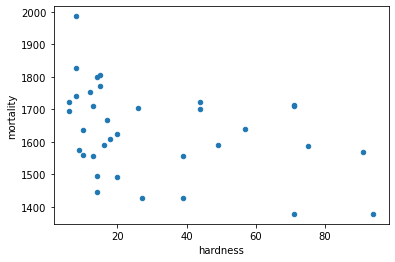

In [206]:
north.plot(kind='scatter', x='hardness', y='mortality')

In [207]:
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [208]:
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [209]:
X = north[['hardness']]
y = north['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [210]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [211]:
model.score(X_test, y_test) 

0.018885304285745863

In [212]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

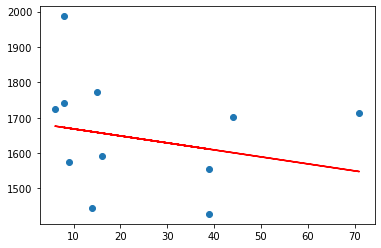

In [213]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

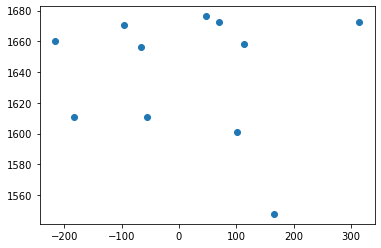

In [214]:
leftover = y_test - y_pred
plt.scatter(leftover, y_pred)